# __Blackbox Model Lab: Loan Approval__

## __Information__

In this lab, you will apply ensemble learning techniques to predict loan approval outcomes using a structured dataset. The dataset includes demographic, financial, and credit history features, with the target variable `loan_status` indicating whether a loan was approved (1) or rejected (0). Your task is to explore the data through EDA, clean and preprocess it as needed, and build predictive models using **two** of the following methods: **Bagging**, **Random Forest**, or **Boosting**.

You are expected to document your workflow using markdown, including insights from your EDA, preprocessing decisions, and modeling rationale. After training both models, evaluate their performance using relevant metrics such as accuracy, precision, recall, F1-score, and confusion matrix. Conclude with a comparative analysis of the two models, discussing which performed better and why. This lab emphasizes not only technical execution but also clear communication of your process and findings.


## __Data Dictionary__
| Column                          | Description                                             | Type        |
|----------------------------------|---------------------------------------------------------|-------------|
| person_age                       | Age of the person                                       | Float       |
| person_gender                    | Gender of the person                                    | Categorical |
| person_education                 | Highest education level                                 | Categorical |
| person_income                   | Annual income                                           | Float       |
| person_emp_exp                   | Years of employment experience                          | Integer     |
| person_home_ownership            | Home ownership status (e.g., rent, own, mortgage)       | Categorical |
| loan_amnt                        | Loan amount requested                                   | Float       |
| loan_intent                      | Purpose of the loan                                     | Categorical |
| loan_int_rate                    | Loan interest rate                                      | Float       |
| loan_percent_income              | Loan amount as a percentage of annual income            | Float       |
| cb_person_cred_hist_length       | Length of credit history in years                       | Float       |
| credit_score                     | Credit score of the person                              | Integer     |
| previous_loan_defaults_on_file  | Indicator of previous loan defaults                     | Categorical |
| loan_status (target variable)    | Loan approval status: 1 = approved; 0 = rejected        | Integer     |



## Let's Get Started !!!

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
# Upload Data
df = pd.read_csv('./loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [5]:
df.dtypes


person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
df['loan_status'].value_counts(normalize=True) * 100

loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
df.describe(include='all')

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

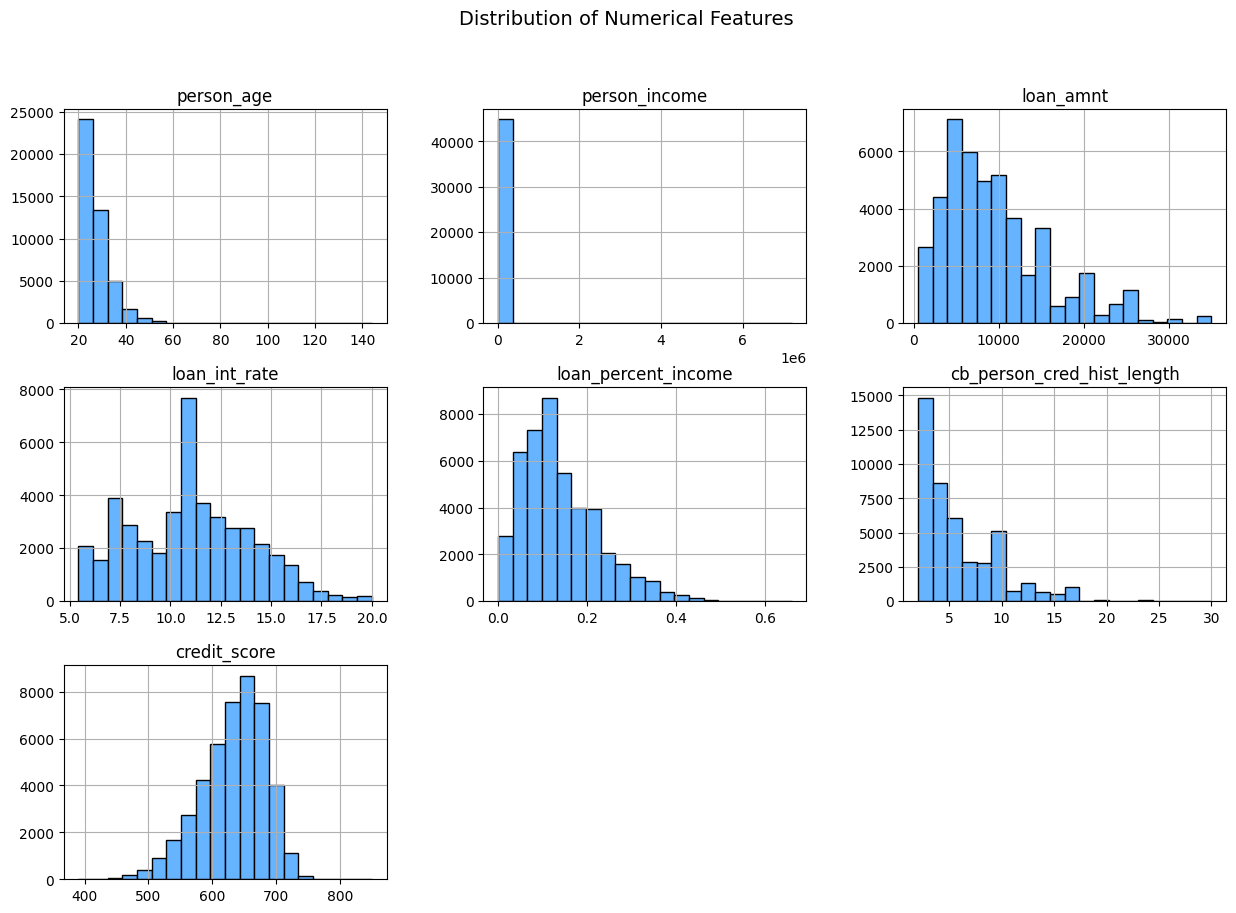

In [14]:
cols = ['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income',
            'cb_person_cred_hist_length','credit_score','person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

num_cols = ['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income',
            'cb_person_cred_hist_length','credit_score']

cat_cols = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']


# Histograms for numerical features
df[num_cols].hist(bins=20, figsize=(15,10), color='#66b3ff', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()



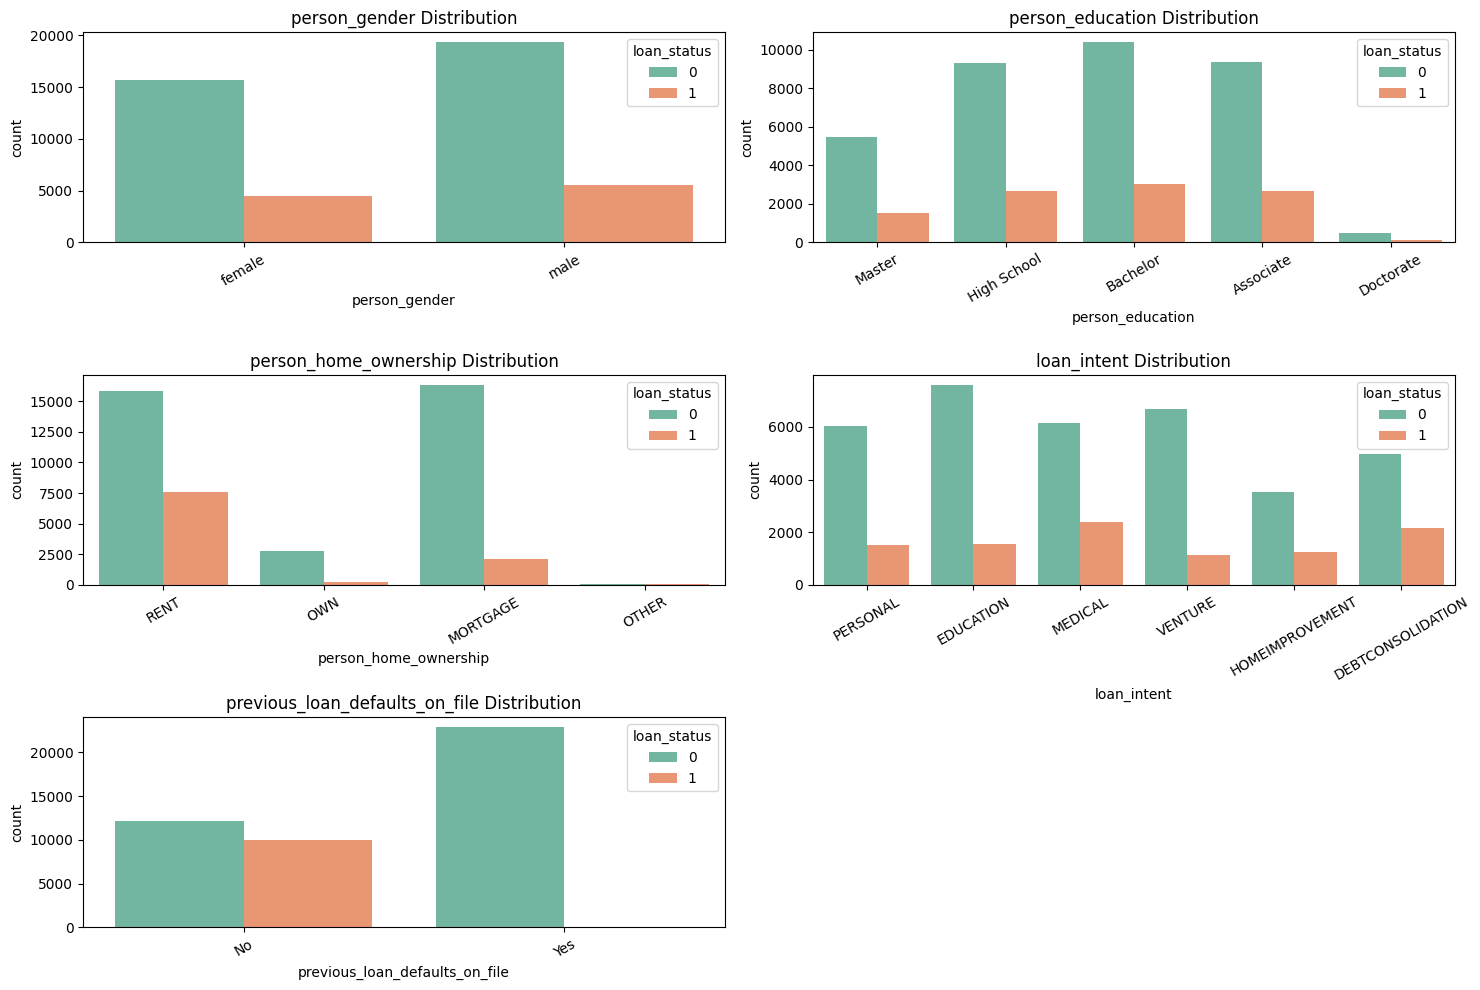

In [56]:
# Count plots for categorical features
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df, hue='loan_status', palette='Set2')
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


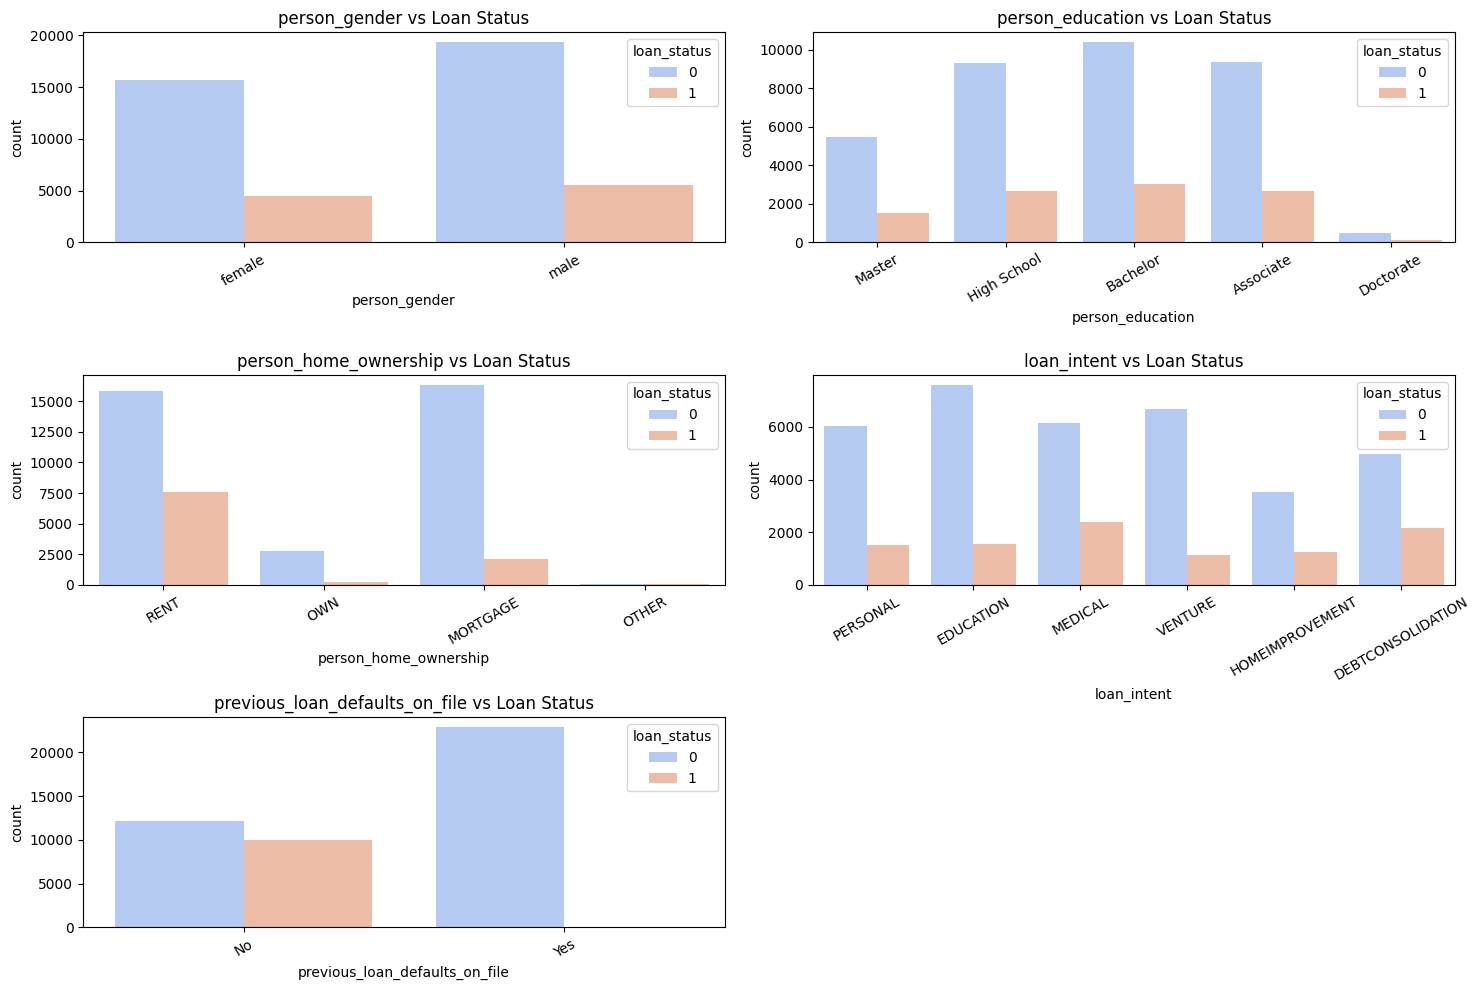

In [18]:
# Categorical vs Loan Status
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='loan_status', data=df, palette='coolwarm')
    plt.title(f"{col} vs Loan Status")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
# Numerical vs Loan Status
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='loan_status', y=col, data=df,hue='loan_status', palette='Set3')
    plt.title(f"{col} by Loan Status")
plt.tight_layout()
plt.show()

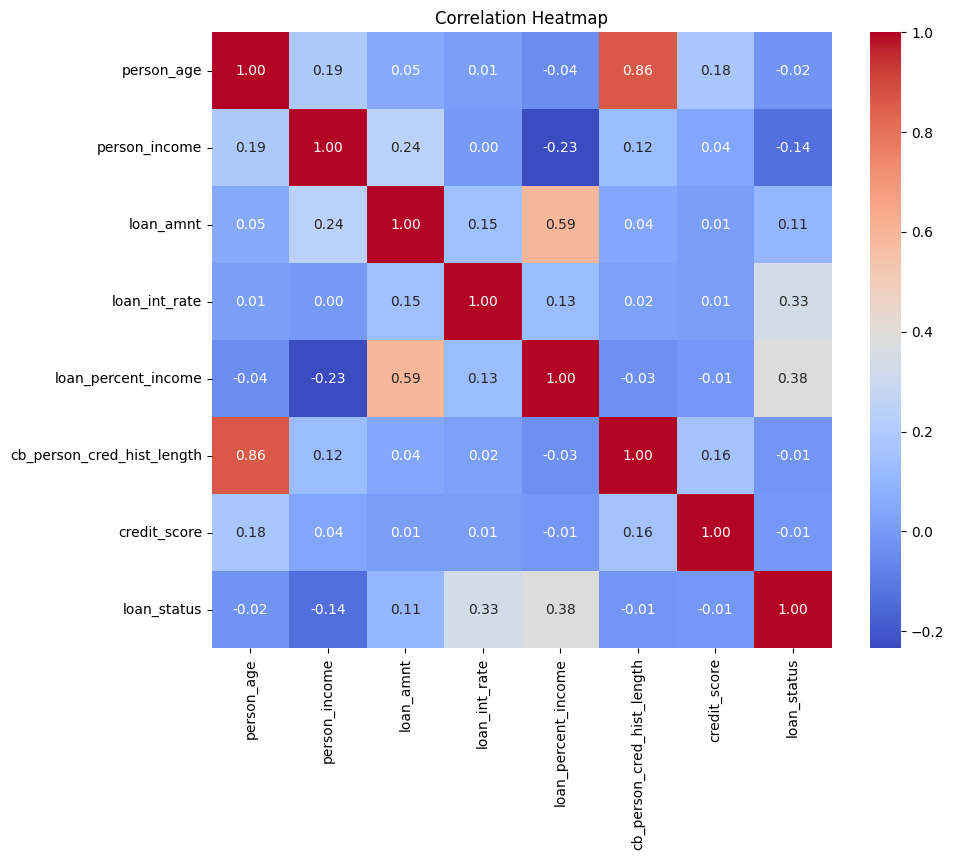

In [22]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols + ['loan_status']].corr(), annot=True, cmap='coolwarm', fmt=".2f", )
plt.title("Correlation Heatmap")
plt.show()



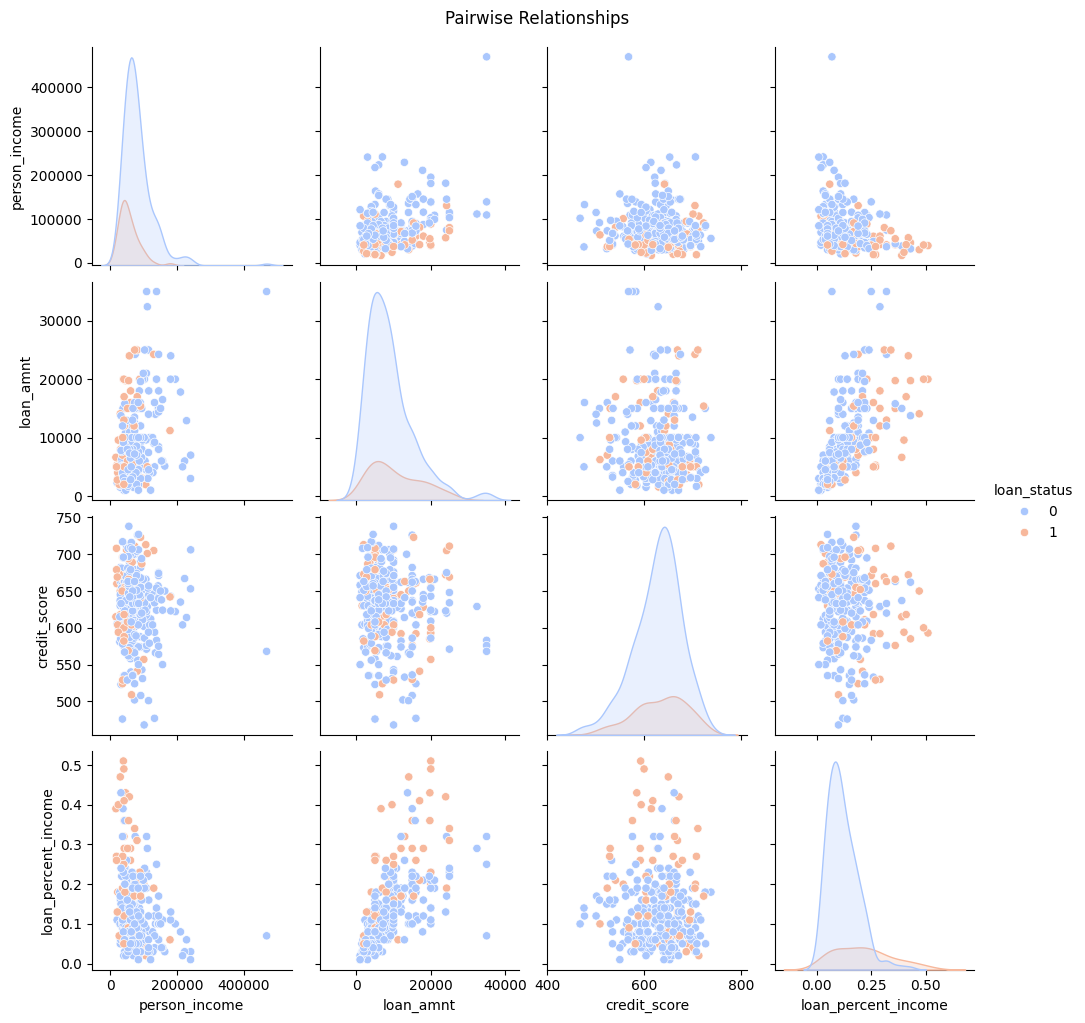

In [21]:
# Pairplot 
sns.pairplot(df.sample(300), vars=['person_income','loan_amnt','credit_score','loan_percent_income'],
             hue='loan_status', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


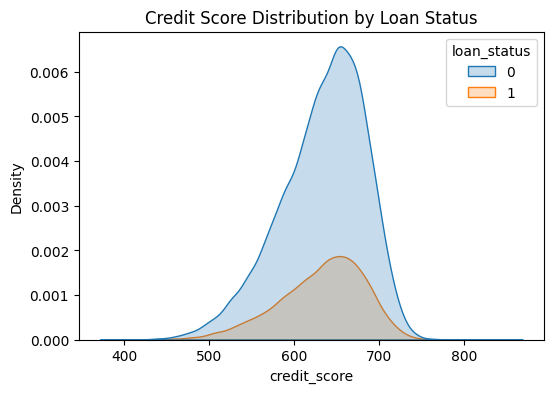

In [23]:
# Credit Score vs Loan Status
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='credit_score', hue='loan_status', fill=True)
plt.title("Credit Score Distribution by Loan Status")
plt.show()

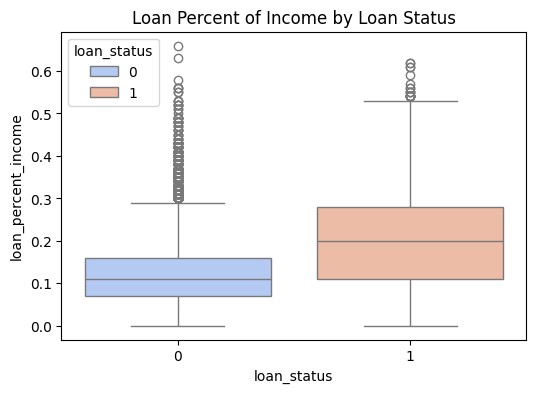

In [27]:
# Loan Percent Income vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, hue='loan_status', palette='coolwarm')
plt.title("Loan Percent of Income by Loan Status")
plt.show()

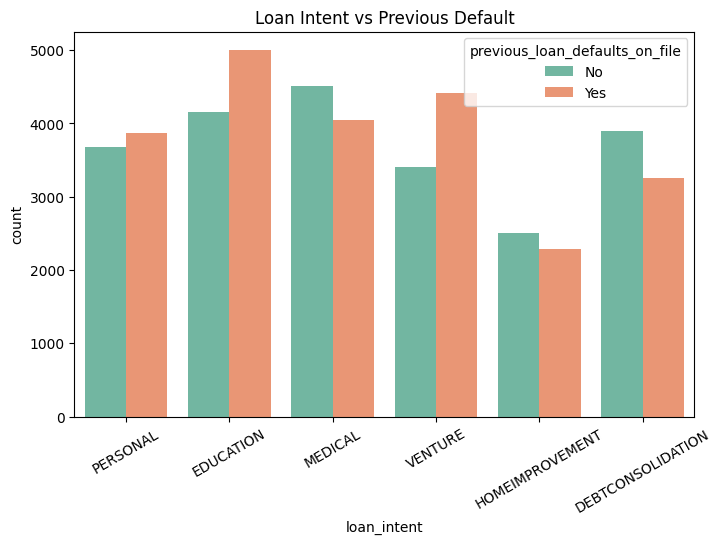

In [28]:
# Loan Intent and Default Interaction
plt.figure(figsize=(8,5))
sns.countplot(x='loan_intent', hue='previous_loan_defaults_on_file', data=df, palette='Set2')
plt.title("Loan Intent vs Previous Default")
plt.xticks(rotation=30)
plt.show()


## Random Forest


In [29]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [30]:
X = pd.get_dummies(X, drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [32]:
rfclass = RandomForestClassifier(n_estimators=150, max_features=4, oob_score=True, random_state=1)
rfclass.fit(X_train, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [33]:
# Compute the out-of-bag accuracy score.
display(rfclass.oob_score_)

# Find the average accuracy score.

display(rfclass.score(X_test, y_test))

0.9277925925925926

0.9279111111111111

#### Second Version

In [34]:
imp_df = (pd.DataFrame({
    'feature': X_train.columns,                     
    'importance': rfclass.feature_importances_
}).sort_values('importance', ascending=False))

display(imp_df)


,feature,importance
21,previous_loan_defaults_on_file_Yes,0.218722
5,loan_percent_income,0.160157
4,loan_int_rate,0.155388
1,person_income,0.129296
3,loan_amnt,0.061432
15,person_home_ownership_RENT,0.055401
7,credit_score,0.055280
0,person_age,0.031532
2,person_emp_exp,0.028823
6,cb_person_cred_hist_length,0.026332


In [35]:
less_importent_features = [
    'loan_intent_EDUCATION','loan_intent_MEDICAL','loan_amnt','person_emp_exp',
    'person_age','person_education_Master','person_home_ownership_OTHER',
    'person_education_Doctorate','person_education_Bachelor',
    'cb_person_cred_hist_length','person_education_High School','loan_intent_PERSONAL'
]


In [36]:
X1 = X.drop(columns=less_importent_features, errors='ignore')

In [37]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=42, stratify=y)

In [38]:
rfclass = RandomForestClassifier(n_estimators=150, max_features=4, oob_score=True, random_state=1)
rfclass.fit(X_train1, y_train)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,4
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [39]:
# Compute the out-of-bag accuracy score.
display(rfclass.oob_score_)

# Find the average accuracy score.
display(rfclass.score(X_test1, y_test))

0.9255407407407408

0.9243555555555556

In [40]:
xgb = XGBClassifier(n_estimators = 150,max_depth = 4,learning_rate = 1)
xgb.fit(X_train.values, y_train.values)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
xgb.score(X_train, y_train)

0.9787851851851852

In [42]:
xgb.score(X_test, y_test)

0.9283555555555556

In [43]:
len(rfclass.feature_importances_)

10

In [44]:
X.shape[1]

22

In [45]:
xgb_importances = xgb.feature_importances_   # same length as X_train.columns
xgb_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_importances
}).sort_values('importance', ascending=False)

display(xgb_imp_df)

,feature,importance
21,previous_loan_defaults_on_file_Yes,0.833590
15,person_home_ownership_RENT,0.026402
5,loan_percent_income,0.025726
14,person_home_ownership_OWN,0.021088
20,loan_intent_VENTURE,0.014478
4,loan_int_rate,0.014280
17,loan_intent_HOMEIMPROVEMENT,0.008941
1,person_income,0.008654
18,loan_intent_MEDICAL,0.007537
13,person_home_ownership_OTHER,0.005999


In [46]:
pgrid = {
    'learning_rate': np.arange(0.1, 0.3, 0.1),
    'n_estimators': np.arange(100, 300, 25),
    'max_depth': [1,2,3,4]
}

xgb1 = XGBClassifier(random_state=42)
gs = GridSearchCV(xgb1, pgrid, cv=5, n_jobs=6)

In [47]:
gs.fit(X_train, y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': array([0.1, 0.2]), 'max_depth': [1, 2, ...], 'n_estimators': array([100, 1...25, 250, 275])}"
,scoring,None
,n_jobs,6
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [48]:
gs.score(X_train, y_train)

0.9560888888888889

In [49]:
gs.score(X_test, y_test)

0.9363555555555556

In [50]:
gs.best_params_

{'learning_rate': np.float64(0.2),
 'max_depth': 4,
 'n_estimators': np.int64(250)}

## LightGBM

In [51]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(
    random_state=42,
    class_weight='balanced' 
)

In [52]:
pgrid = {
    'learning_rate': np.arange(0.1, 0.31, 0.1),   
    'n_estimators' : np.arange(100, 301, 25),     
    'max_depth'    : [-1, 2, 3, 4],               
    'num_leaves'   : [15, 31, 63]                 
}


In [53]:
gs = GridSearchCV(
    estimator=lgb,
    param_grid=pgrid,
    cv=5,
    n_jobs=6,
)


In [ ]:
gs.fit(X_train, y_train)

In [ ]:
print(gs.score(X_train, y_train))    
print(gs.score(X_test,  y_test))      
print(gs.best_params_)               
best_lgb = gs.best_estimator_
